<a href="https://colab.research.google.com/github/derektorquette/processamento-de-lingua-natural-ufmg/blob/main/6_machine_larning_classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Carregando Corpus**

## Tarefa de aprendizagem de Máquina (AM) que visa aprender a mapear uma entrada para uma entrada para uma categoria com base em exemplos de pares de entrada-categoria

Será desenvolvido um modelo de AM que classificará se um nome é masculino ou feminino.


In [ ]:
import nltk

nltk.download('names')

from nltk.corpus import names
import random

nomes_masculinos = [(nome, 'masc') for nome in names.words('male.txt')]
nomes_femininos = [(nome, 'fem') for nome in names.words('female.txt')]

nomes = nomes_masculinos + nomes_femininos
random.shuffle(nomes) ## para embaralhar os nomes


for nome in nomes [:10]: #imprimir os 10 primeiros
  print(nome)

##**Extração de Features**
Features é o nome dado às características relevnates da entrada para fazer a classificação.

Por intuição, definimos o primeiro e o último caracteres, asssim como o número total de caracteres como features relevantes para a classificação se um nome é masculino ou feminino.

In [ ]:
nomes [5][0] #extrair um elemento de uma lista

nomes [5][0][0]
nomes [5][0][-1] #extrair o primeiro caractere

# len(nomes[0][0]) para extrair a quantidade de caracteres

'n'

In [ ]:
def extrair_features(nome):
  caracter2id = { c:i for i, c in enumerate('abcdefghijklmnopqrstuvxz_')}

  try:
    primeiro_caractere = caracter2id[nome.lower()[0]]
  except:
    primeiro_caractere = caracter2id['_']

  try:
    ultimo_caractere = caracter2id[nome.lower()[-1]]
  except:
    ultimo_caractere = caracter2id['_']

  total_caracteres = len(nome)

  return [primeiro_caractere, ultimo_caractere, total_caracteres]

X, y = [], [] #matriz x e variavel y
for row in nomes [:10]:
  nome, categoria = row

  features = extrair_features(nome)

  classe = 1 if categoria == 'fem' else 0     # passando a categoria de string para número
  print(nome, features, classe)

  X.append(features) # essas features que serão passadas para um classificador
  y.append(classe)

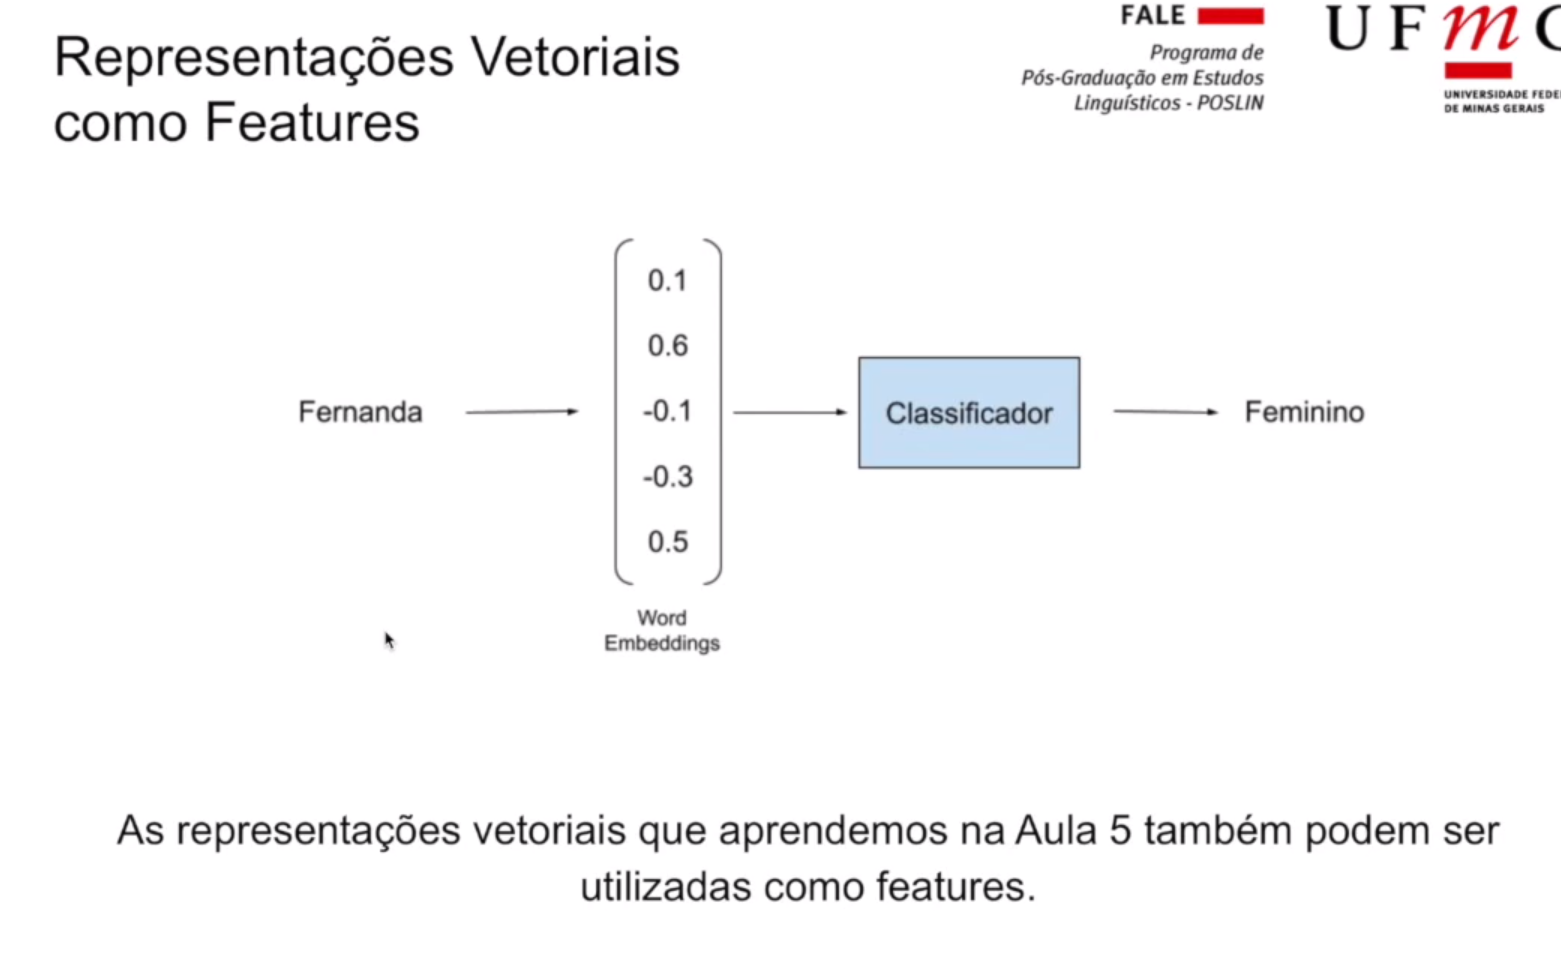

##**Para instanciar uma Árvore de Decisão, basta utilizar a classe "DecicionTreeClassifier" do Scikit-Learn**

para treinar o modelo, basta chamar seu método fit, passando como entradas as features dos nomes de treinamento (x) e suas categorias (y)

https://scikit-learn.org/0.21/documentation.html




In [ ]:
from sklearn.tree import DecisionTreeClassifier

ad = DecisionTreeClassifier()
ad.fit(X, y)

DecisionTreeClassifier()

In [ ]:
nome = 'João'
features = extrair_features(nome)

previsao = ad.predict([features])

if previsao == 1:
  print('Feminino')
else:
  print('Masculino')



Feminino


##**NAIVE BAYES**


para instanciar um classificar Naive Bayes, basta utilizar a classe "GaussianNB" do Scikit Learn.



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

In [ ]:
nome = 'Ana'
features = extrair_features(nome)

previsao = nb.predict([features])

if previsao == 1:
  print('Feminino')
else:
  print('Masculino')

Feminino


##**REGRESSÃO LOGÍSTICA**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)


LogisticRegression()

In [ ]:
nome = 'João' # os três modelos retornam "joao" como feminino
features = extrair_features(nome)

previsao = lr.predict([features])

if previsao == 1:
  print('Feminino')
else:
  print('Masculino')

Masculino


##**AVALIAÇÃO**

80% DO CORPUS PARA TREINAMENTO E 20% PARA TESTE


In [ ]:
tam = int(len(nomes) * 0.2)
treino = nomes[tam:]
teste = nomes[:tam]

len(treino), len(teste)

(6356, 1588)

##**treinar os modelos no conjunto de treinamento**

esse modelo atrás avalia os três modelos diferentes



In [ ]:
treino_X = [extrair_features(row[0]) for row in treino]
treino_y = [1 if row[1] == 'fem' else 0 for row in treino]

treino[0], treino_X[0], treino_y[0]



(('Trey', 'masc'), [19, 24, 4], 0)

In [ ]:
treino_X = [extrair_features(row[0]) for row in treino]
treino_y = [1 if row[1] == 'fem' else 0 for row in treino]


ad = DecisionTreeClassifier()
ad.fit(treino_X, treino_y)

nb = GaussianNB()
nb.fit(treino_X, treino_y)

lr = LogisticRegression()
lr.fit(treino_X, treino_y)

LogisticRegression()

##**Teste os modelo classificando os nomes do conjunto de teste**

In [ ]:
teste_X = [extrair_features(row[0]) for row in teste]
teste_y = [1 if row[1] == 'fem' else 0 for row in teste]

predicao_ad = ad.predict(teste_X)
predicao_nb = nb.predict(teste_X)
predicao_lr = lr.predict(teste_X)




## para saber o quão bem o modelo fez a classificação, podemos comparar suas predições com as categorias reais a partir de medidas de desempenho como acurácia, f1-score, etc

fonte: scikit learn

In [ ]:
from sklearn.metrics import accuracy_score, f1_score #se espera uma acurácia de mais de 70% para ser um modelo robusto

acuracia = accuracy_score(teste_y, predicao_ad)
f1 = f1_score(teste_y, predicao_ad)
print('Arvore de Decisao - Acurácia: ', round(acuracia, 2), 'F1:', round(f1, 2))

acuracia = accuracy_score(teste_y, predicao_nb)
f1 = f1_score(teste_y, predicao_ad)
print('Naive Bayes - Acurácia: ', round(acuracia, 2), 'F1:', round(f1, 2))

acuracia = accuracy_score(teste_y, predicao_lr)
f1 = f1_score(teste_y, predicao_ad)
print('Regressao Logistica- Acurácia: ', round(acuracia, 2), 'F1:', round(f1, 2))


Arvore de Decisao - Acurácia:  0.75 F1: 0.81
Naive Bayes - Acurácia:  0.7 F1: 0.81
Regressao Logistica- Acurácia:  0.7 F1: 0.81


##**EXEMPLO REAL DE CLASSIFICADOR**

In [ ]:
!wget hhtps://raw.githubusercontent.com/b2wdigital/bw2-reviews01/master/B2W-Reviews01.csv #não funcionou

hhtps://raw.githubusercontent.com/b2wdigital/bw2-reviews01/master/B2W-Reviews01.csv: Unsupported scheme ‘hhtps’.
